# MCMC Tutorial

In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

## Exercise 1: Building blocks of sampling algorithms

In [4]:
np.random.seed(17)

alpha = np.random.uniform(0,1, 100)

def A1(input_array):
    select = np.zeros(len(input_array))
    
    for i in range(len(input_array)):
        if input_array[i] < 0.5:
            select[i] = -1
        else:
            select[i] = 1
    return select
A1(alpha)

array([-1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,
        1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,
       -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,
        1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.])

In [6]:
def A2(input_array, probability):
    select = []
    
    for i in range(len(input_array)):
        if input_array[i] < probability:
            select.append(input_array[i])
    return np.array(select)
A2(alpha, 0.5)

array([0.294665  , 0.19152079, 0.06790036, 0.03906292, 0.3578136 ,
       0.06004468, 0.05119367, 0.48352862, 0.28298816, 0.29772572,
       0.39604744, 0.41848439, 0.14390392, 0.15090669, 0.05524135,
       0.29231735, 0.19877387, 0.08233975, 0.15895874, 0.11847226,
       0.44499607, 0.06797873, 0.13394567, 0.029157  , 0.39037449,
       0.43725199, 0.49287267, 0.13042928, 0.06570232, 0.19744378,
       0.0833254 , 0.01569619, 0.27381319, 0.23638113, 0.31051984,
       0.08273549, 0.35328125, 0.22019207, 0.24537239, 0.06412777,
       0.45373746, 0.48767733, 0.10616885, 0.49814368, 0.08015134])

In [7]:
def A3(input_array, probability, x):
    select = []
    
    for i in range(len(input_array)):
        if input_array[i] < probability:
            select.append(x[i])
        
    return np.array(select)
A3(alpha, 0.5, A1(alpha))

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1.])

## Exercise 2: MCMC of Supernova data; measuring $\Omega_m$, $\omega_0$, $\omega_a$

In [6]:
filepath = '/Users/RuoyanWang/Documents/LEIDEN/SPRING2019/MAS/Modern-Astrostatistics/AllExercises/MCMCFiles'

header = ['omega_m', 'w_0', 'w_a', 'log_likelihood']
supernova_seed176 = pd.read_csv(filepath+'/Supernova_Seed176.txt', sep='\s+', header=None)
supernova_seed176.columns = header

In [7]:
supernova_seed176

,omega_m,w_0,w_a,log_likelihood
0,0.257485,-0.974555,-0.004249,7.706199e-08
1,0.274696,-1.032989,0.011397,7.113661e-08
2,0.316647,-0.987692,-0.122898,3.412462e-08
3,0.324245,-0.989946,-0.070460,1.884167e-08
4,0.306070,-0.892005,0.029044,2.193044e-09
5,0.194347,-0.935037,0.072854,7.068449e-09
6,0.275299,-1.060908,0.055298,5.632992e-08
7,0.279380,-1.056624,-0.091186,5.046068e-08
8,0.268313,-0.989501,-0.104364,7.502082e-08
9,0.283274,-0.867116,-0.181511,1.764756e-08


In [8]:
omega_m = pd.DataFrame(supernova_seed176['omega_m'])
w_0 = pd.DataFrame(supernova_seed176['w_0'])
w_a = pd.DataFrame(supernova_seed176['w_a'])

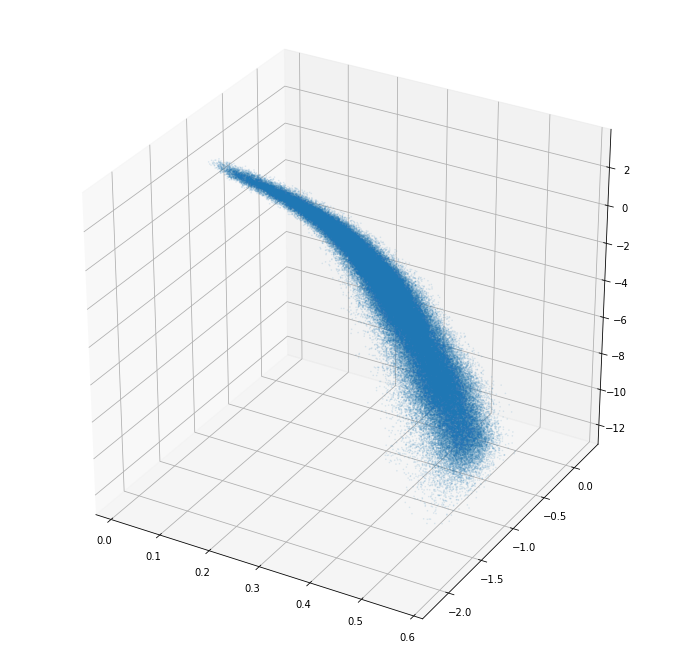

In [9]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(omega_m, w_0, w_a, s=2, alpha=0.1, marker='.')

Text(0, 0.5, '$\\omega_a$')

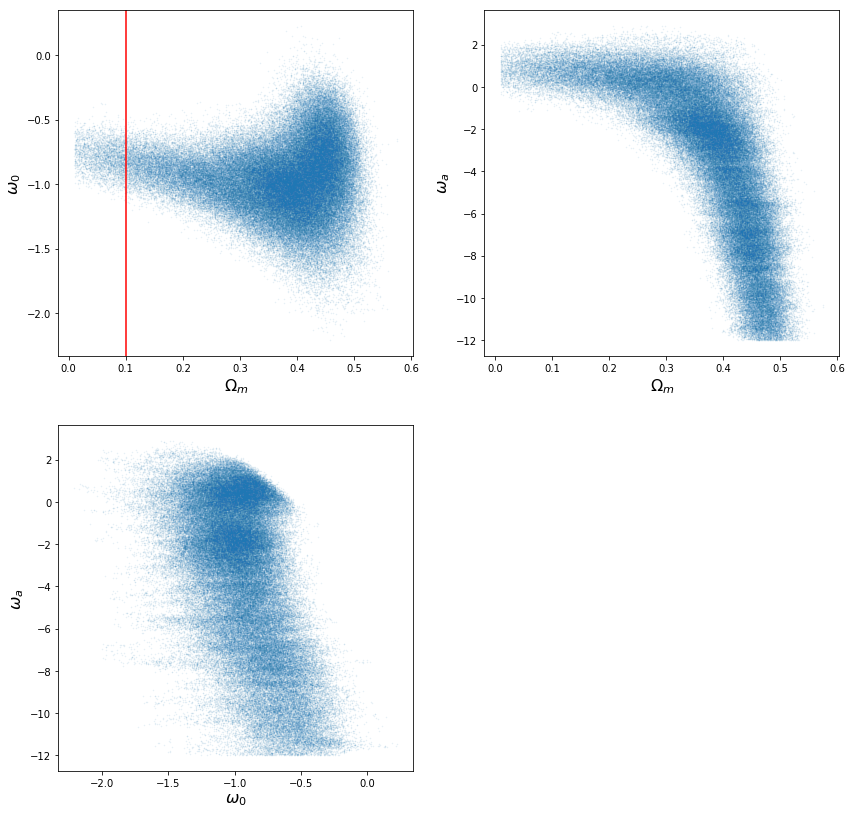

In [10]:
plt.figure(figsize=(14,14))

plt.subplot(221)
plt.plot(omega_m, w_0, '.', markersize=1, alpha=0.1)
plt.axvline(0.1, c='r')
plt.xlabel('$\Omega_m$', fontsize=16)
plt.ylabel('$\omega_0$', fontsize=16)

plt.subplot(222)
plt.plot(omega_m, w_a, '.', markersize=1, alpha=0.1)
plt.xlabel('$\Omega_m$', fontsize=16)
plt.ylabel('$\omega_a$', fontsize=16)

plt.subplot(223)
plt.plot(w_0, w_a, '.', markersize=1, alpha=0.1)
plt.xlabel('$\omega_0$', fontsize=16)
plt.ylabel('$\omega_a$', fontsize=16)

In [11]:
log_likelihood = supernova_seed176['log_likelihood']
supernova_seed176.loc[np.where(log_likelihood==max(log_likelihood))]

,omega_m,w_0,w_a,log_likelihood
56257,0.235322,-0.961676,0.393441,8.819592e-08


## Exercise 3: Uncleaned MC chain from a cosmic microwave background analysis

In [12]:
bad_neutrino_viscocity_chain = pd.read_csv(filepath+'/Bad_NeutrinoViscosity_Chain.txt', sep='\s+', header=None)
bad_neutrino_viscocity_chain

,0,1,2,3,4,5,6,7,8,9,10
0,2,2232.6100,2.292630,0.117680,0.899858,1.796986,0.719692,0.083278,0.333296,0.333320,10.233060
1,1,2216.1400,2.292484,0.117589,0.900046,1.796270,0.719540,0.083340,0.333268,0.333328,10.237270
2,2,2190.3700,2.292247,0.117543,0.900168,1.796184,0.719566,0.083278,0.333251,0.333345,10.231660
3,1,2133.1800,2.292330,0.117552,0.900041,1.797562,0.719204,0.083347,0.333198,0.333368,10.237270
4,1,2063.9700,2.292653,0.117556,0.900124,1.798861,0.719063,0.083196,0.333195,0.333376,10.223240
5,1,1977.2700,2.293351,0.117562,0.899944,1.801125,0.718948,0.083075,0.333189,0.333389,10.210600
6,9,1961.7000,2.293359,0.117575,0.899917,1.801837,0.718544,0.083264,0.333206,0.333382,10.227450
7,2,1903.4000,2.293531,0.117598,0.899800,1.804109,0.718519,0.083324,0.333193,0.333401,10.231660
8,4,1843.4400,2.293400,0.117596,0.899796,1.804897,0.718205,0.083109,0.333205,0.333397,10.213410
9,4,1803.3900,2.292716,0.117557,0.899765,1.807141,0.718821,0.083060,0.333199,0.333384,10.210600


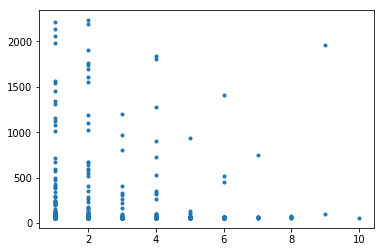

In [13]:
plt.plot(bad_neutrino_viscocity_chain[0], bad_neutrino_viscocity_chain[1], '.')
#plt.yscale('log')

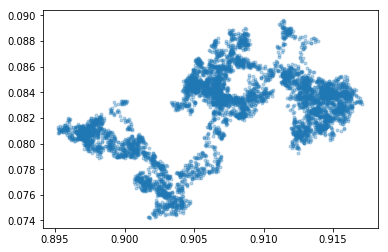

In [14]:
plt.plot(bad_neutrino_viscocity_chain[4], bad_neutrino_viscocity_chain[7], '.', alpha=0.3)

In [16]:
mu = 0.315
sigma = 0.017
CMB = np.random.normal(mu, sigma, len(supernova_seed176['omega_m']))

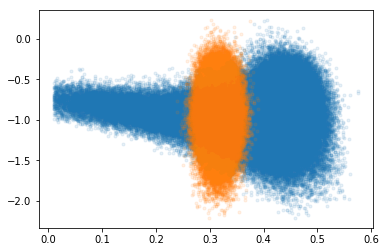

In [38]:
weight = np.exp((0.315-omega_m)**2/(-2.*0.017**2))/(np.sqrt(2*np.pi*0.017**2))
plt.plot(omega_m, w_0, '.', alpha=0.1)
plt.plot(CMB, w_0, '.', alpha=0.1)